In [89]:
import os
from collections import defaultdict

import numpy as np
import rf
import rf.imaging
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.interpolate import interp1d
import obspy

In [2]:
src_file = r"..\DATA\OA-ZRT-R-cleaned.h5"

In [3]:
oa_all = rf.read_rf(src_file, "h5")

In [4]:
print(oa_all)

25038 Trace(s) in Stream:

Prf OA.BS24.0M.HHR | -5.0s - 60.0s onset:2017-09-28T11:38:29.060000Z | 100.0 Hz, 6501 samples | mag:5.3 dist:48.6 baz:8.8 slow:7.70
...
(25036 other traces)
...
Prf OA.CJ27.0M.HHZ | -25.0s - 75.0s onset:2018-07-12T06:57:35.035000Z | 100.0 Hz, 10001 samples | mag:5.3 dist:35.8 baz:101.1 slow:8.27

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [5]:
db = defaultdict(lambda: defaultdict(list))

In [6]:
for s in oa_all:
    _, sta, _, cha = s.id.split('.')
    db[sta][cha].append(s)

In [7]:
db.keys()

dict_keys(['BS24', 'BS25', 'BS26', 'BS27', 'BS28', 'BT23', 'BT24', 'BT25', 'BT26', 'BT27', 'BT28', 'BU22', 'BU23', 'BU24', 'BU25', 'BU26', 'BU27', 'BU28', 'BV21', 'BV22', 'BV23', 'BV24', 'BV26', 'BV27', 'BV28', 'BW20', 'BW21', 'BW22', 'BW23', 'BW24', 'BW25', 'BW26', 'BW27', 'BW28', 'BX20', 'BX21', 'BX22', 'BX23', 'BX24', 'BX25', 'BX26', 'BX27', 'BX28', 'BY20', 'BY21', 'BY22', 'BY23', 'BY24', 'BY25', 'BY26', 'BY27', 'BY28', 'BZ20', 'BZ21', 'BZ22', 'BZ23', 'BZ24', 'BZ25', 'BZ26', 'BZ27', 'BZ28', 'CA20', 'CA21', 'CA22', 'CA23', 'CA24', 'CA25', 'CA26', 'CA27', 'CA28', 'CB20', 'CB21', 'CB22', 'CB23', 'CB24', 'CB25', 'CB26', 'CB27', 'CB28', 'CC20', 'CC21', 'CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'CD21', 'CD22', 'CD23', 'CD24', 'CD25', 'CD26', 'CD27', 'CD28', 'CE22', 'CE23', 'CE24', 'CE25', 'CE26', 'CE27', 'CE28', 'CF22', 'CF23', 'CF24', 'CF25', 'CF27', 'CF28', 'CG21', 'CG22', 'CG23', 'CH21', 'CH22', 'CH23', 'CI21', 'CI22', 'CI23', 'CJ27'])

In [8]:
db['BS24'].keys()

dict_keys(['HHR', 'HHT', 'HHZ'])

In [9]:
len(db['BS24']['HHR'])

17

In [10]:
for subd in db.values():
    subd['size'] = len(subd['HHR'])

In [11]:
for k, v in db.items():
    print(k + ": " + str(v['size']))

BS24: 17
BS25: 50
BS26: 30
BS27: 107
BS28: 78
BT23: 102
BT24: 71
BT25: 42
BT26: 16
BT27: 82
BT28: 66
BU22: 113
BU23: 97
BU24: 104
BU25: 82
BU26: 32
BU27: 82
BU28: 59
BV21: 82
BV22: 51
BV23: 15
BV24: 85
BV26: 116
BV27: 97
BV28: 96
BW20: 95
BW21: 87
BW22: 40
BW23: 59
BW24: 19
BW25: 25
BW26: 105
BW27: 101
BW28: 100
BX20: 25
BX21: 79
BX22: 65
BX23: 48
BX24: 97
BX25: 101
BX26: 103
BX27: 81
BX28: 109
BY20: 63
BY21: 56
BY22: 93
BY23: 100
BY24: 33
BY25: 96
BY26: 106
BY27: 97
BY28: 95
BZ20: 102
BZ21: 55
BZ22: 55
BZ23: 101
BZ24: 33
BZ25: 97
BZ26: 110
BZ27: 84
BZ28: 84
CA20: 87
CA21: 95
CA22: 80
CA23: 94
CA24: 27
CA25: 66
CA26: 69
CA27: 32
CA28: 91
CB20: 91
CB21: 37
CB22: 64
CB23: 88
CB24: 101
CB25: 103
CB26: 63
CB27: 66
CB28: 91
CC20: 98
CC21: 62
CC22: 97
CC23: 56
CC24: 69
CC25: 52
CC26: 86
CC27: 102
CC28: 92
CD21: 89
CD22: 34
CD23: 69
CD24: 61
CD25: 63
CD26: 59
CD27: 76
CD28: 81
CE22: 69
CE23: 58
CE24: 25
CE25: 63
CE26: 80
CE27: 79
CE28: 63
CF22: 15
CF23: 70
CF24: 75
CF25: 83
CF27: 84
CF28: 84


In [12]:
sta = 'BU24'

In [13]:
oa_bu24 = db[sta]

In [14]:
oa_bu24

defaultdict(list,
            {'HHR': [Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-09-28T11:38:28.280000Z | 100.0 Hz, 6501 samples | mag:5.3 dist:48.5 baz:7.6 slow:7.71,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-09-29T14:02:31.460000Z | 100.0 Hz, 6501 samples | mag:5.5 dist:85.2 baz:315.1 slow:4.99,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-10-06T08:09:22.455000Z | 100.0 Hz, 6501 samples | mag:6.3 dist:57.5 baz:9.4 slow:7.05,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-10-06T15:06:20.460000Z | 100.0 Hz, 6501 samples | mag:5.9 dist:56.7 baz:6.7 slow:7.10,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-10-08T14:13:13.245000Z | 100.0 Hz, 6501 samples | mag:5.4 dist:47.5 baz:98.2 slow:7.78,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-10-08T20:57:10.325000Z | 100.0 Hz, 6501 samples | mag:5.8 dist:44.6 baz:166.3 slow:7.99,
              Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-10-08T22:46:33.295000Z | 100

In [15]:
oa_bu24['HHR'][0].meta

          network: OA
          station: BU24
         location: 0M
          channel: HHR
        starttime: 2017-09-28T11:38:23.280000Z
          endtime: 2017-09-28T11:39:28.280000Z
    sampling_rate: 100.0
            delta: 0.01
             npts: 6501
            calib: 1.0
          _format: H5
             amax: 0.411035
     back_azimuth: 7.61108217122
         distance: 48.4695077453
      event_depth: 10.0
         event_id: 1540
   event_latitude: 28.7941
  event_longitude: 140.5324
  event_magnitude: 5.3
       event_time: 2017-09-28T11:29:45.700000Z
      inclination: 23.7160419549
            onset: 2017-09-28T11:38:28.280000Z
            phase: P
       processing: ['ObsPy 1.1.0: trim(endtime=UTCDateTime(2017, 9, 28, 11, 40, 58, 280000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 9, 28, 11, 37, 38, 280000))', "ObsPy 1.1.0: detrend(options={}::type='linear')", "ObsPy 1.1.0: interpolate(args=()::method='weighted_average_slopes'::npts=None

In [38]:
def plot_station_rf_overlays(db_station):
    plt.figure(figsize=(16,24))
    colors = ["#8080a040", "#80a08040", "#a0808040"]
    min_x = 1e+20
    max_x = -1e20
    for i, (ch, streams) in enumerate(db_station.items()):
        if ch == 'size' or i >= 3:
            continue
        col = colors[i]
        plt.subplot(3, 1, i + 1)
        sta = streams[0].stats.station
        plt.title('.'.join([sta, ch]), fontsize=14)
        for j, s in enumerate(streams):
            lead_time = s.stats.onset - s.stats.starttime
            times = s.times()
            plt.plot(times - lead_time, s.data, '--', color=col, linewidth=2)
            if j == 0:
                data_mean = s.data
            else:
                data_mean += s.data
        data_mean /= float(j)
        plt.plot(s.times() - lead_time, data_mean, color="#202020", linewidth=2)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (normalized)')
        plt.grid(linestyle=':', color="#80808020")
        x_lims = plt.xlim()
        min_x = min(min_x, x_lims[0])
        max_x = max(max_x, x_lims[1])
    for i in range(3):
        subfig = plt.subplot(3, 1, i + 1)
        subfig.set_xlim((min_x, max_x))

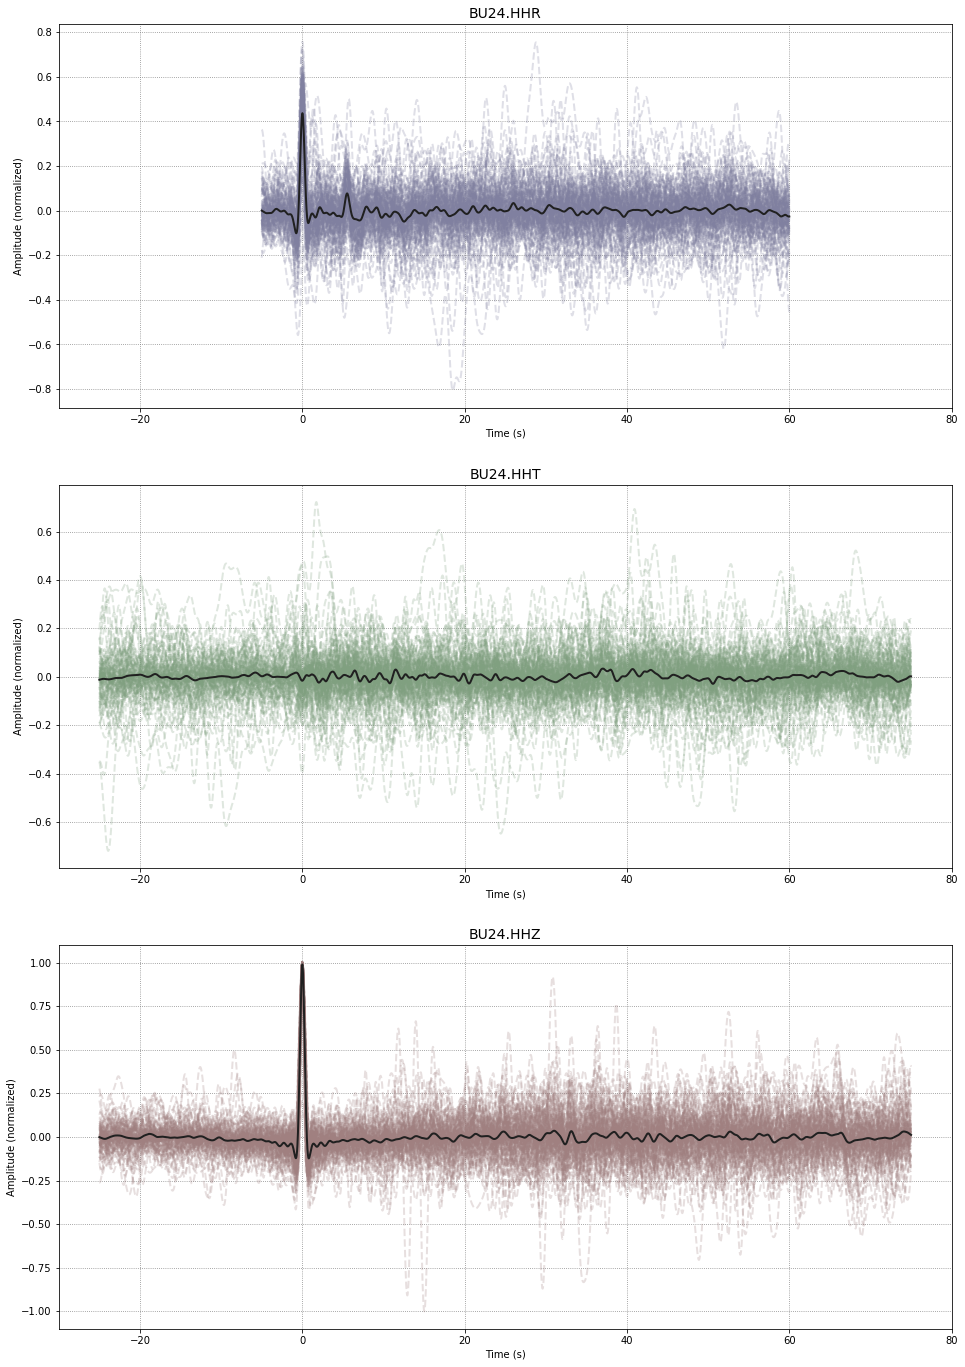

In [39]:
plot_station_rf_overlays(oa_bu24)

In [56]:
h_range = np.linspace(25.0, 65.0, 401)
k_range = np.linspace(1.5, 2.1, 301)

In [57]:
k_grid, h_grid = np.meshgrid(k_range, h_range)

In [58]:
# Make sure to choose a perceptually linear color map
colmap = 'plasma'

In [59]:
hk_stack = np.zeros_like(k_grid)

In [60]:
hk_stack.shape

(401, 301)

In [61]:
V_p = 6.5

In [63]:
H_on_V_p = h_grid/V_p

In [64]:
k2 = k_grid*k_grid

In [68]:
k2.shape

(401, 301)

In [69]:
incidence_rad = 23.0*np.pi/180.0

In [70]:
cos_i, sin_i = np.cos(incidence_rad), np.sin(incidence_rad)

In [71]:
sin2_i = sin_i*sin_i

In [74]:
term1 = H_on_V_p*k_grid*np.abs(cos_i)

In [75]:
term2 = H_on_V_p*np.sqrt(1 - k2*sin2_i)

In [76]:
t1 = term1 - term2

In [77]:
t1.shape

(401, 301)

In [78]:
t2 = term1 + term2

In [79]:
t2.shape

(401, 301)

In [82]:
np.min(t1[:]), np.max(t1[:])

(2.1942929374648497, 13.614644374879948)

In [83]:
np.min(t2[:]), np.max(t2[:])

(8.4269169100633086, 25.046559470122549)

In [85]:
ch_hhr = oa_bu24['HHR']

In [87]:
stream_0 = ch_hhr[0]

In [96]:
stream_0.stats.inclination

23.716041954923696

In [88]:
stream_0

Prf OA.BU24.0M.HHR | -5.0s - 60.0s onset:2017-09-28T11:38:28.280000Z | 100.0 Hz, 6501 samples | mag:5.3 dist:48.5 baz:7.6 slow:7.71

In [90]:
interpolator = interp1d(stream_0.times(), stream_0.data, kind='cubic', copy=False, bounds_error=False, assume_sorted=True)

In [91]:
interpolator(t1)

array([[-0.00097499, -0.00120971, -0.00143581, ...,  0.31242168,
         0.30009693,  0.2874947 ],
       [-0.0011979 , -0.00142486, -0.00165   , ...,  0.28962678,
         0.27679319,  0.263758  ],
       [-0.00141221, -0.00163852, -0.00185196, ...,  0.26605167,
         0.2528653 ,  0.23956775],
       ..., 
       [-0.05298549, -0.05482317, -0.05545523, ..., -0.00793064,
        -0.00781014, -0.00749973],
       [-0.05380423, -0.05518449, -0.05542055, ..., -0.00786746,
        -0.0076094 , -0.00716274],
       [-0.05445435, -0.05539315, -0.05525146, ..., -0.00770618,
        -0.0073137 , -0.00673834]])

In [93]:
stream_stack = interpolator(t1) + interpolator(t2)

In [135]:
stream_stack = []
for s in ch_hhr:
    incidence = s.stats.inclination
    incidence_rad = incidence*np.pi/180.0
    cos_i, sin_i = np.cos(incidence_rad), np.sin(incidence_rad)
    sin2_i = sin_i*sin_i
    term1 = H_on_V_p*k_grid*np.abs(cos_i)
    term2 = H_on_V_p*np.sqrt(1 - k2*sin2_i)
    t1 = term1 - term2
    t2 = term1 + term2
    interpolator = interp1d(s.times(), s.data, kind='cubic', copy=False, bounds_error=False, assume_sorted=True)
    stream_sum = interpolator(t1) + interpolator(t2)
#     stream_sum = stream_sum*stream_sum  # Second order
    stream_stack.append(stream_sum)

In [136]:
len(stream_stack)

104

In [137]:
hk_stack = np.nansum(np.array(stream_stack), axis=0)

In [138]:
hk_stack.shape

(401, 301)

In [141]:
# hk_stack = np.sqrt(hk_stack)  # Second order

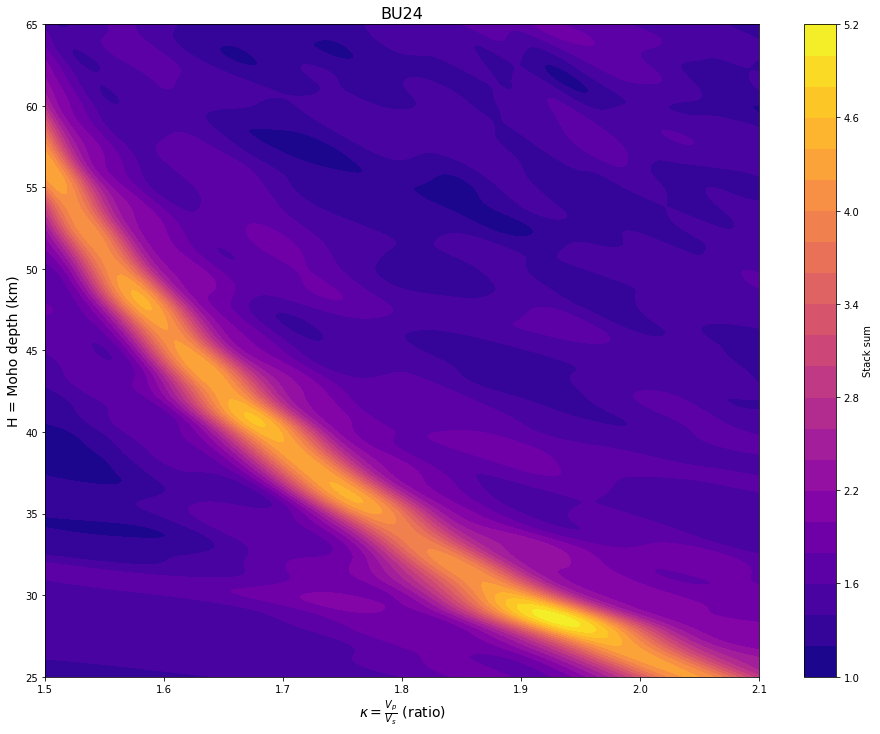

In [142]:
plt.figure(figsize=(16, 12))
plt.contourf(k_grid, h_grid, hk_stack, levels=20, cmap=colmap)
plt.xlabel(r'$\kappa = \frac{V_p}{V_s}$ (ratio)', fontsize=14)
plt.ylabel('H = Moho depth (km)', fontsize=14)
plt.title('{}'.format(ch_hhr[0].stats.station), fontsize=16)
cb = plt.colorbar()
_ = cb.ax.set_ylabel('Stack sum')